读取日志

In [62]:
import re

log_file = "log.log"  # 替换为实际的日志文件路径
log_file = "best_fit_demo.log"
log_file = "best_fit_00_head20.log"
log_file = "best_fit_03_head20.log"

data = {}

# 读取日志文件
with open(log_file, "r") as file:
    current_timestamp = None
    current_stats = {}

    for line in file:
        # 使用正则表达式匹配时间戳
        match_timestamp = re.match(r"\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3} - INFO - ={10}(\d+)={10}", line)
        if match_timestamp:
            current_timestamp = match_timestamp.group(1)
            current_stats = {}
            data[current_timestamp] = current_stats
        else:
            # 使用正则表达式匹配节点标识和CPU、内存占用情况
            match_stats = re.match(r"\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3} - INFO - (\d+) \| cpu\((\d+\.\d+)%\): (\d+)/(\d+) \| memory\((\d+\.\d+)%\): (\d+)/(\d+)", line)
            if match_stats:
                node = match_stats.group(1)
                cpu_rate = float(match_stats.group(2))
                now_cpu = int(match_stats.group(3))
                max_cpu = int(match_stats.group(4))
                memory_rate = float(match_stats.group(5))
                now_memory = int(match_stats.group(6))
                max_memory = int(match_stats.group(7))

                current_stats[node] = {}

                current_stats[node]["global"] = {"cpu_rate": cpu_rate, "now_cpu": now_cpu,
                                       "max_cpu": max_cpu, "memory_rate": memory_rate,
                                       "now_memory": now_memory, "max_memory": max_memory}

# # 打印解析结果
# for timestamp, stats in data.items():
#     print(f"Timestamp: {timestamp}")
#     for node, tmp_data in stats.items():
#         print(f"Node: {node} {tmp_data}")
data

{'0': {'0': {'global': {'cpu_rate': 53.49,
    'now_cpu': 3400,
    'max_cpu': 6356,
    'memory_rate': 62.66,
    'now_memory': 18432,
    'max_memory': 29414}}},
 '263': {},
 '836': {'1': {'global': {'cpu_rate': 53.49,
    'now_cpu': 3400,
    'max_cpu': 6356,
    'memory_rate': 62.66,
    'now_memory': 18432,
    'max_memory': 29414}}},
 '981': {'1': {'global': {'cpu_rate': 53.49,
    'now_cpu': 3400,
    'max_cpu': 6356,
    'memory_rate': 62.66,
    'now_memory': 18432,
    'max_memory': 29414}},
  '2': {'global': {'cpu_rate': 53.49,
    'now_cpu': 3400,
    'max_cpu': 6356,
    'memory_rate': 62.66,
    'now_memory': 18432,
    'max_memory': 29414}}},
 '1085': {'1': {'global': {'cpu_rate': 53.49,
    'now_cpu': 3400,
    'max_cpu': 6356,
    'memory_rate': 62.66,
    'now_memory': 18432,
    'max_memory': 29414}},
  '2': {'global': {'cpu_rate': 53.49,
    'now_cpu': 3400,
    'max_cpu': 6356,
    'memory_rate': 62.66,
    'now_memory': 18432,
    'max_memory': 29414}},
  '3': {'g

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] ['0', '1*', '2*', '3*', '4*', '5*', '6*', '7*', '8*', '9*']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] ['0-', '1*', '2*', '3*', '4*', '5*', '6*', '7*', '8*', '9*']
[1, 0, 2, 3, 4, 5, 6, 7, 8, 9] ['1', '0-', '2*', '3*', '4*', '5*', '6*', '7*', '8*', '9*']
[1, 2, 0, 3, 4, 5, 6, 7, 8, 9] ['1', '2', '0-', '3*', '4*', '5*', '6*', '7*', '8*', '9*']
[1, 2, 3, 0, 4, 5, 6, 7, 8, 9] ['1', '2', '3', '0-', '4*', '5*', '6*', '7*', '8*', '9*']
[2, 3, 0, 1, 4, 5, 6, 7, 8, 9] ['2', '3', '0-', '1-', '4*', '5*', '6*', '7*', '8*', '9*']
[3, 0, 1, 2, 4, 5, 6, 7, 8, 9] ['3', '0-', '1-', '2-', '4*', '5*', '6*', '7*', '8*', '9*']
[3, 4, 0, 1, 2, 5, 6, 7, 8, 9] ['3', '4', '0-', '1-', '2-', '5*', '6*', '7*', '8*', '9*']
[4, 0, 1, 2, 3, 5, 6, 7, 8, 9] ['4', '0-', '1-', '2-', '3-', '5*', '6*', '7*', '8*', '9*']
[4, 5, 0, 1, 2, 3, 6, 7, 8, 9] ['4', '5', '0-', '1-', '2-', '3-', '6*', '7*', '8*', '9*']
[5, 0, 1, 2, 3, 4, 6, 7, 8, 9] ['5', '0-', '1-', '2-', '3-', '4-', '6*', '7*', '8*', '9*']
[0, 

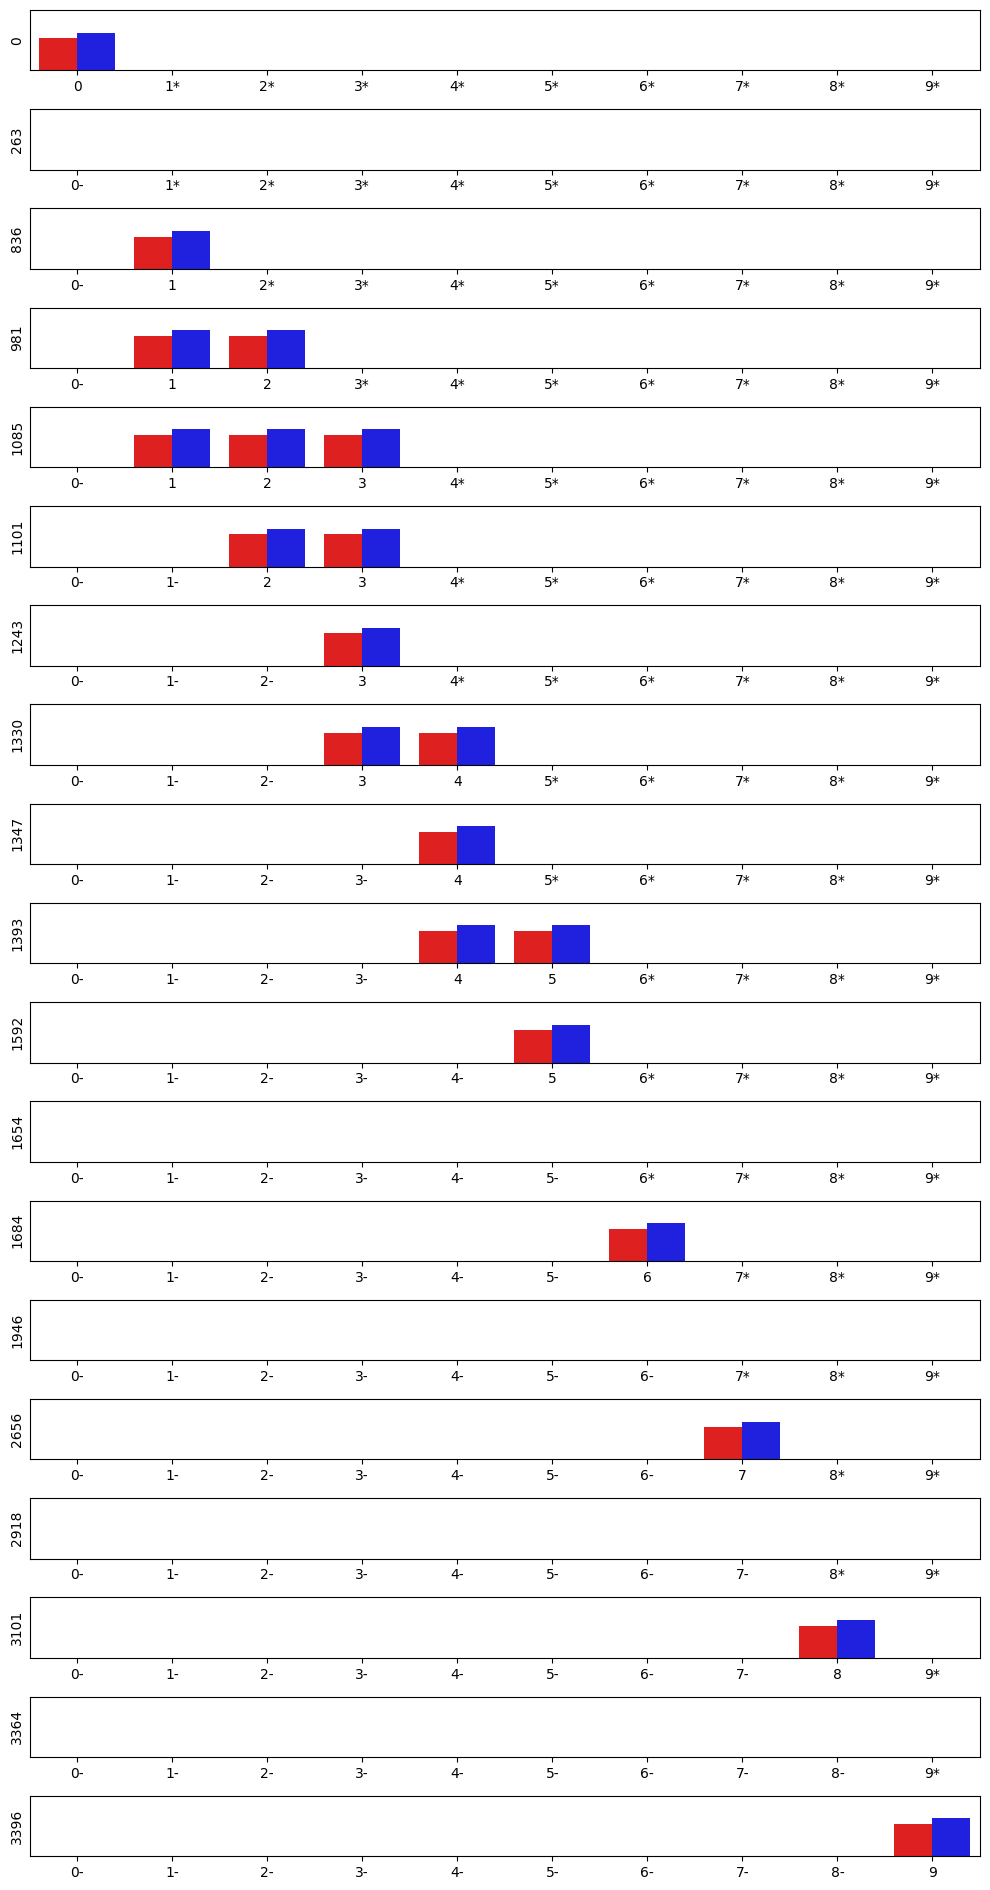

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

timestamp_list = list(data.keys())[:-1]
tmp_data_list = list(data.values())[:-1]

n = len(timestamp_list)
max_node_id = -1 # 最大的node_id
for tmp_data in tmp_data_list:
    node_id_list = [int(i) for i in list(tmp_data.keys())]
    if not len(node_id_list) == 0:
        max_node_id = max([max_node_id, max(node_id_list)])
# fig_size = (n, max_node_id+1) 
fig_size = (max_node_id+1, n) # 画布需要适时调整
fig, ax = plt.subplots(n,1, figsize=fig_size)

tmp_max_node_id = -1

# 遍历所有帧
for i in range(n):
    timestamp = timestamp_list[i]
    tmp_data = tmp_data_list[i]
    # print(timestamp)
    # 数据构造
    node_id_list = []
    cpu_rate_list = []
    memory_rate_list = []
    node_id_label_list = [] # 显示node状态，-表示已删除，*表示未添加
    for k, v in tmp_data.items():
        node_id = int(k)
        if node_id > tmp_max_node_id:
            tmp_max_node_id = node_id
        node_id_list.append(node_id)
        node_id_label_list.append(k)
        cpu_rate_list.append(v["global"]["cpu_rate"])
        memory_rate_list.append(v["global"]["memory_rate"])
    for j in range(max_node_id+1):
        if j not in node_id_list:
            node_id_list.append(j)
            if j <= tmp_max_node_id:
                node_id_label_list.append(f"{j}-")
            else:
                node_id_label_list.append(f"{j}*")
            cpu_rate_list.append(0)
            memory_rate_list.append(0)
    df = pd.DataFrame({"node_id": node_id_list,
                   "cpu_rate": cpu_rate_list,
                   "memory_rate": memory_rate_list})
    # 可视化
    sns.barplot(x="node_id", y="value", hue="variable", data=pd.melt(df, ["node_id"]), 
                ax=ax[i], legend=False, palette=["#FF0000", "#0000FF"])
    ax[i].set_xlabel("")
    ax[i].set_ylabel(timestamp)
    print(node_id_list, node_id_label_list)
    node_id_dict = dict(zip(node_id_list, node_id_label_list))
    # print(node_id_dict)
    ax[i].set_xticks(range(max_node_id+1))
    ax[i].set_xticklabels([node_id_dict[i] for i in range(max_node_id+1)])
    ax[i].set_yticks([])
    ax[i].set_ylim(0, 100)
    # print(node_id_list, cpu_rate_list, memory_rate_list)
        

# 展示图形
plt.tight_layout()
plt.show()